In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import pandas as pd
from pandas import DataFrame
import numpy as np

from sklearn import metrics
from sklearn.metrics import pairwise_distances
import pylab as pl

from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift

In [3]:
newFilePath = "/Users/luisricardoferraz/book-similarity/test/tutorial/tutorial/spiders/synopsis-preprocessing/"

In [4]:
Y = pd.read_csv(newFilePath+'MatrixOfVectorizedSynopsis.csv')
titulos = Y['titulo']
Y = Y.drop(['Unnamed: 0','titulo'],1)

In [7]:
A = pd.read_csv(newFilePath+'MatrixOfDistances.csv')
A = A.drop(['Unnamed: 0'],1)

In [8]:
filePath = '/Users/luisricardoferraz/book-similarity/test/tutorial/tutorial/spiders/clustering/'

In [9]:
dbscan = DBSCAN(metric='precomputed')

dbscan.fit_predict(A)

dbscanclusters = dbscan.labels_.tolist()
dbscandataframe = pd.DataFrame()
dbscandataframe['titulo'] = titulos
dbscandataframe['cluster'] = dbscanclusters

,titulo,cluster
0,Tapete Vermelho,0
1,Hunter,0
2,Cage,0
3,Espere Por Mim,0
4,Vox,0
5,Ayra,0
6,Amor Plus Size,0
7,O Sal da Vida,0
8,Aliança,0
9,A Dança dos Dragões,0


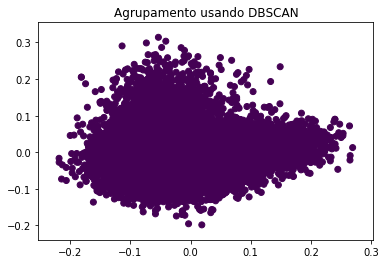

In [11]:
pca = PCA(n_components=2).fit_transform(Y)
pl.figure('Reference Plot')
pl.scatter(pca[:, 0], pca[:, 1], c=dbscandataframe['cluster'])
pl.title('Agrupamento usando DBSCAN')
pl.show()

In [12]:
n_clusters = max(dbscandataframe['cluster'])+1
print(n_clusters)

1


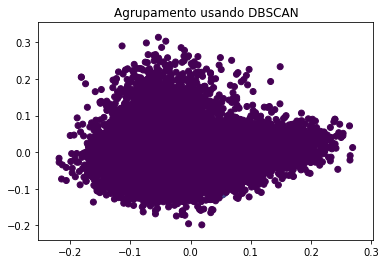

In [13]:
dbscan = DBSCAN(metric='euclidean')

dbscan.fit_predict(Y)

dbscanclusters = dbscan.labels_.tolist()
dbscandataframe = pd.DataFrame()
dbscandataframe['titulo'] = titulos
dbscandataframe['cluster'] = dbscanclusters

pca = PCA(n_components=2).fit_transform(Y)
pl.figure('Reference Plot')
pl.scatter(pca[:, 0], pca[:, 1], c=dbscandataframe['cluster'])
pl.title('Agrupamento usando DBSCAN')
pl.show()

In [19]:
n_clusters = max(dbscandataframe['cluster'])+1
print(n_clusters)

log = ""

for i in range(-1,n_clusters):
    new_dataframe = dbscandataframe.loc[dbscandataframe['cluster'] == i]
    lista_livros = []
    lista_livros = list(new_dataframe['titulo'])
    log += "\nTotal de livros do cluster %d" %i + ": " + str(len(lista_livros)) + "\n"

print(log)

5

Total de livros do cluster -1: 10141

Total de livros do cluster 0: 6

Total de livros do cluster 1: 6

Total de livros do cluster 2: 6

Total de livros do cluster 3: 6

Total de livros do cluster 4: 5



In [18]:
dbscandataframe['cluster']

0       -1
1       -1
2       -1
3       -1
4       -1
5       -1
6       -1
7       -1
8       -1
9       -1
10      -1
11      -1
12      -1
13      -1
14      -1
15      -1
16      -1
17      -1
18      -1
19      -1
20      -1
21      -1
22      -1
23      -1
24      -1
25      -1
26      -1
27      -1
28      -1
29      -1
        ..
10140   -1
10141   -1
10142   -1
10143   -1
10144   -1
10145   -1
10146   -1
10147   -1
10148   -1
10149   -1
10150   -1
10151   -1
10152   -1
10153   -1
10154   -1
10155   -1
10156   -1
10157   -1
10158   -1
10159   -1
10160   -1
10161   -1
10162   -1
10163   -1
10164   -1
10165   -1
10166   -1
10167   -1
10168   -1
10169   -1
Name: cluster, Length: 10170, dtype: int64

In [ ]:
ms = MeanShift()

ms.fit_predict(Y)

msclusters = ms.labels_.tolist()
msdataframe = pd.DataFrame()
msdataframe['titulo'] = titulos
msdataframe['cluster'] = msclusters

In [ ]:
pca = PCA(n_components=2).fit_transform(Y)
pl.figure('Reference Plot')
pl.scatter(pca[:, 0], pca[:, 1], c=msdataframe['cluster'])
pl.title('Agrupamento usando Mean Shift')
pl.show()